In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r'C:\Users\Aravind\classification project\cleaned employee data.xlsx')
df.head()

,Unnamed: 0,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,1,2017,3,34,1,0,0,0
1,1,1,2013,1,28,0,0,3,1
2,2,1,2014,3,38,0,0,2,0
3,3,2,2016,3,27,1,0,5,1
4,4,2,2017,3,24,1,1,2,1


In [3]:
df=df.drop(columns=["Unnamed: 0"])
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,3,34,1,0,0,0
1,1,2013,1,28,0,0,3,1
2,1,2014,3,38,0,0,2,0
3,2,2016,3,27,1,0,5,1
4,2,2017,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...
4648,1,2013,3,26,0,0,4,0
4649,2,2013,2,37,1,0,2,1
4650,2,2018,3,27,1,0,5,1
4651,1,2012,3,30,1,1,2,0


**X and Y**

In [4]:
x=df.drop(columns="LeaveOrNot")
y=df["LeaveOrNot"]

**Train_Test_Split**

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=True)

# Step:4 & 5: Modelling and Evalution

In [6]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier




from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

**1.Logistic Regression**

In [44]:
#modelling
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

#predict & evaluate on train data
ypred_train=log_model.predict(x_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.6856528747984955
CV Score : 0.6875308508335137
Test Accuracy: 0.664876476906552


**2.KNN**

In [8]:
#Hyperparameter tuning
estimator=KNeighborsClassifier()
pram_grid={"n_neighbors":list(range(1,50)),"p":[1,2]}
knn_grid=GridSearchCV(estimator,pram_grid,scoring="accuracy",cv=5)
knn_grid.fit(x_train,y_train)
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

In [9]:
#modelling
knn_model=knn_grid.best_estimator_
knn_model.fit(x_train,y_train)

#predict & Evaluate on train data
ypred_train=knn_model.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross validation on train data
print("CV score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.800107469102633
CV score: 0.7791509706285632
Test Accuracy: 0.664876476906552


**3.Support vector machine(SVM)**

In [10]:
#hyperparameter tuning
from sklearn.svm import SVC
estimator=SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}
svm_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(x_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [11]:
#modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(x_train,y_train)

#predict and evaluate on train data
ypred_train=svm_model.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross validation on train data
print("CV score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.6628156904889844
CV score: 0.7791509706285632
Test Accuracy: 0.664876476906552


**4.Decision Tree Classifier**

**Default Model**

In [12]:
model=DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

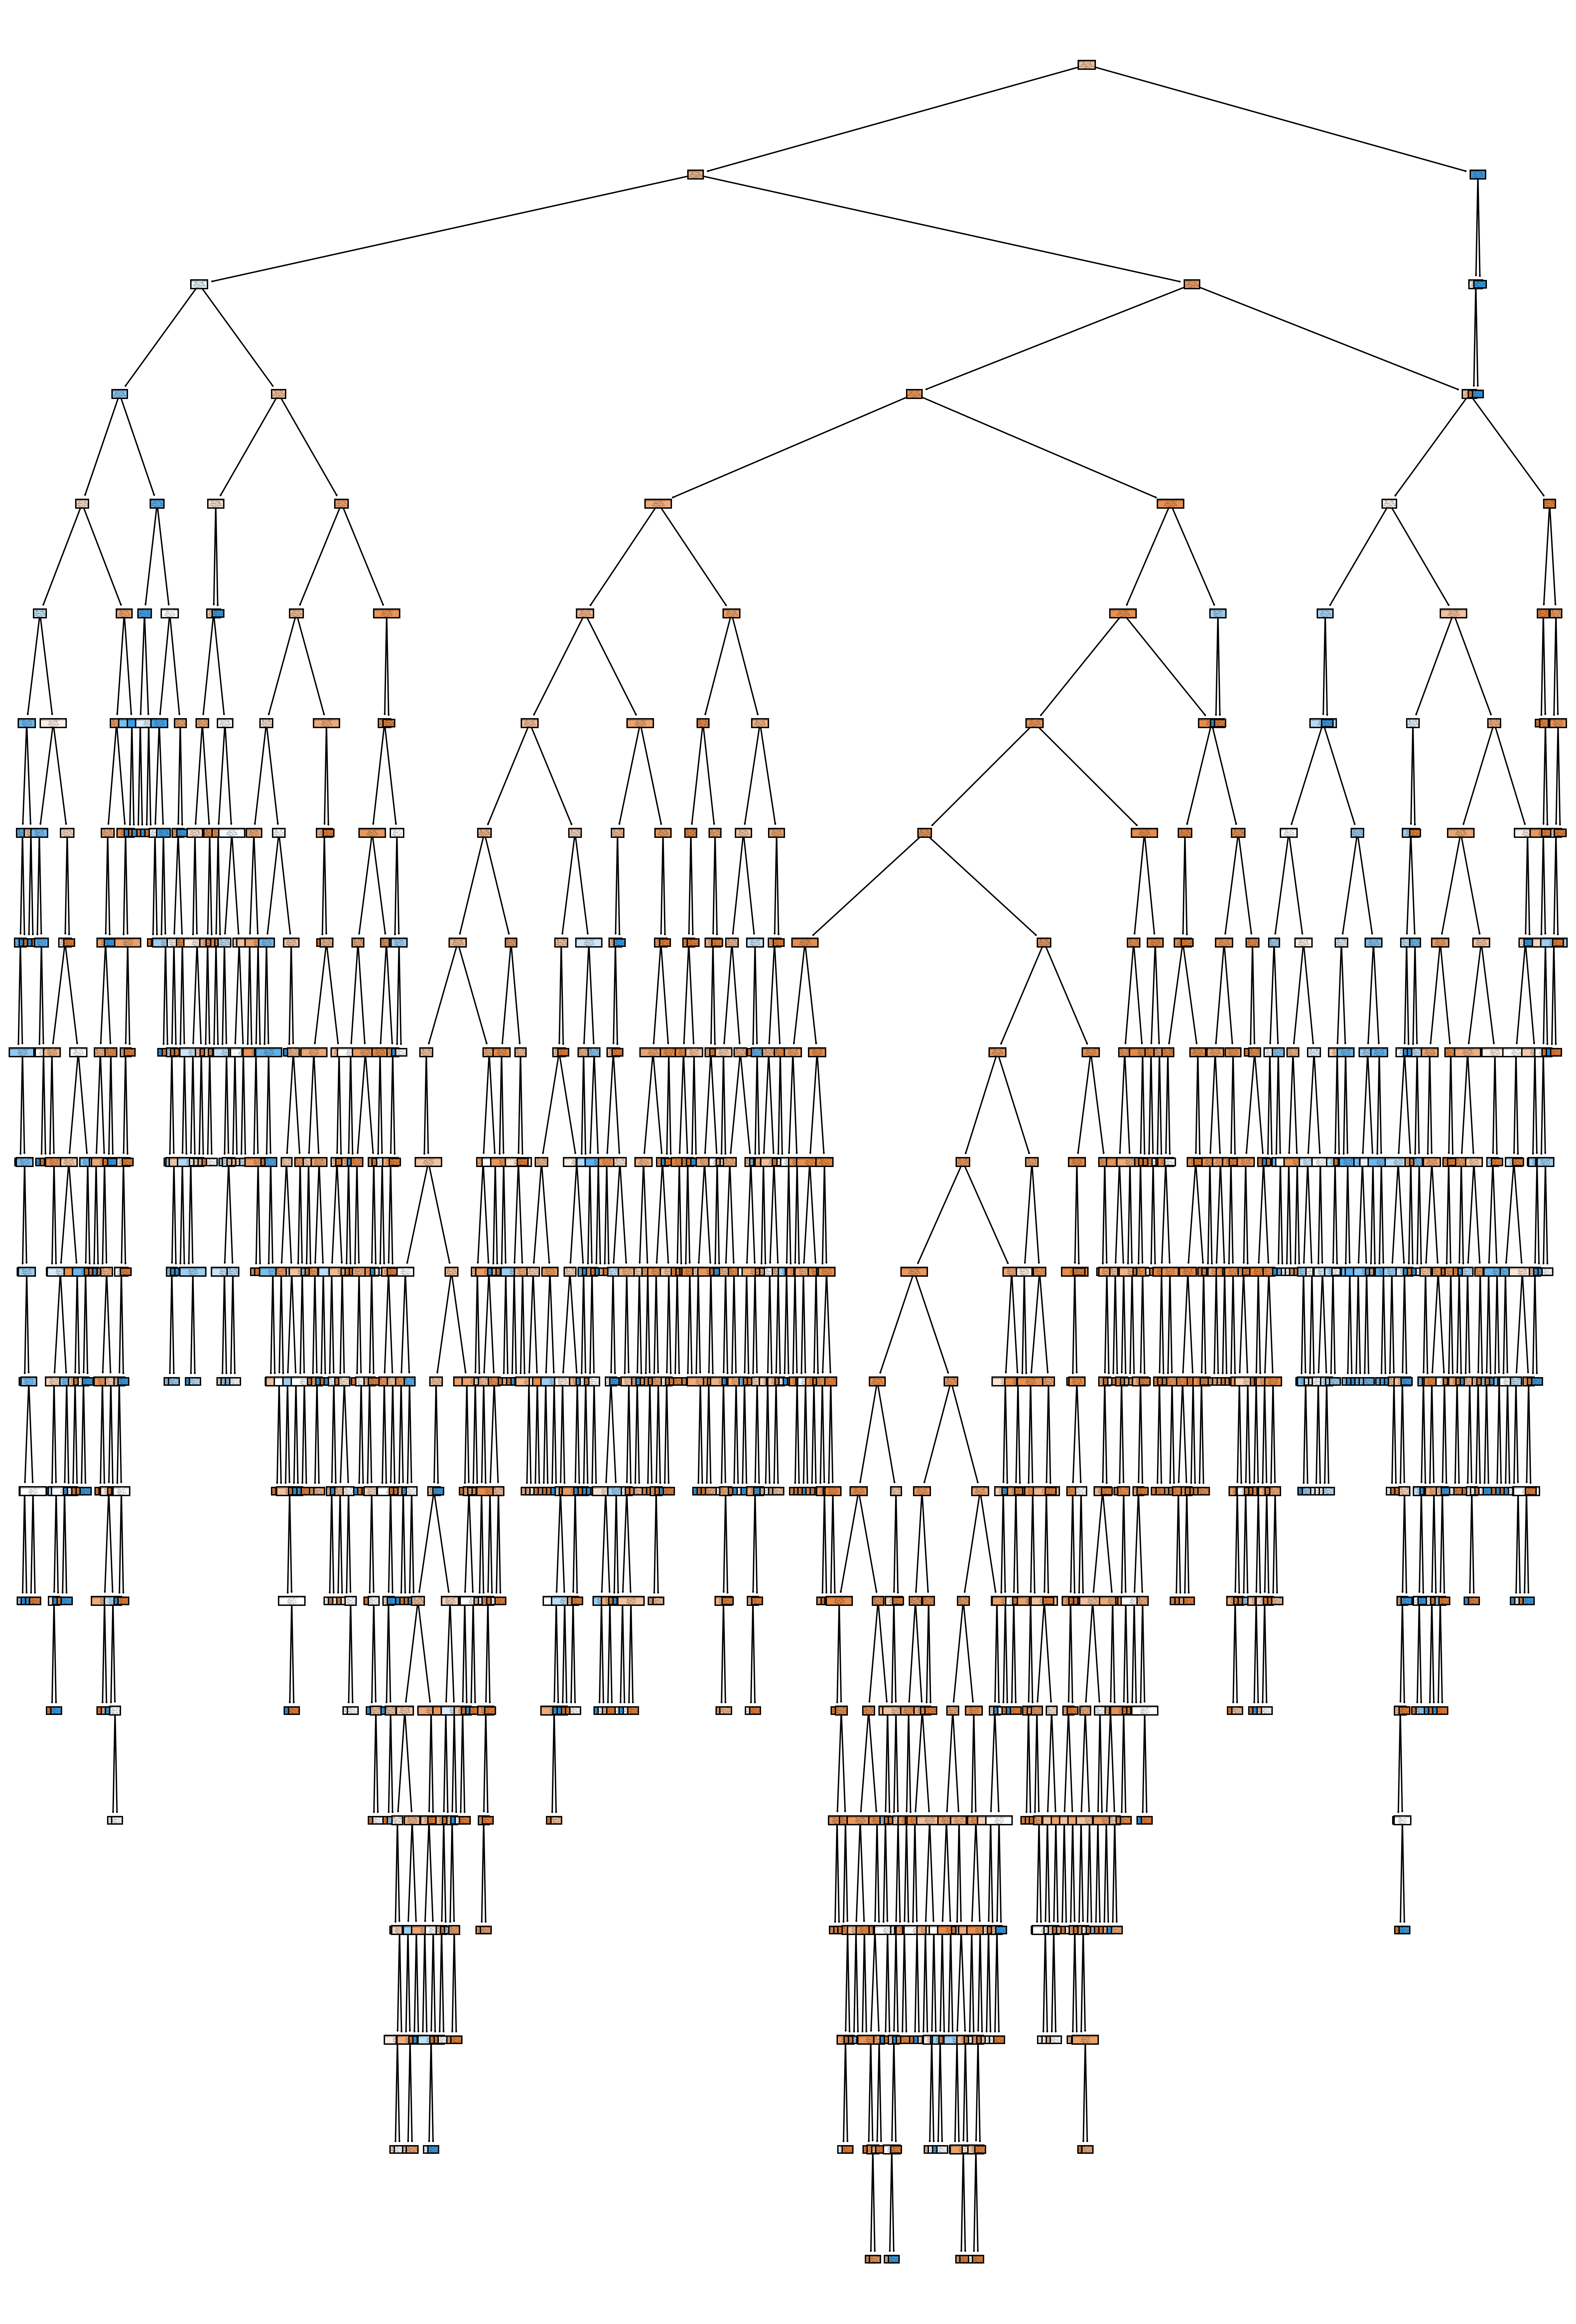

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,30),dpi=300)
plot_tree(model,filled=True,feature_names=x_train.columns.tolist(),class_names=["0","1"])
plt.show()

In [14]:
#Hyper parameter tuning
estimator=DecisionTreeClassifier(random_state=True)
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,16))}

dt_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(x_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=True)

In [15]:
#Import features
feats_ab=pd.DataFrame(data=dt.feature_importances_,index=x.columns,columns=["Importance"])

important_features_dt=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Education',
 'JoiningYear',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain']

**Creating Decision Tree model With important parameters and Important features**

In [16]:
#Selecting train data
x_train_dt=x_train[important_features_dt]

#modelling
dt=dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

#Evaluation
ypred_train=dt.predict(x_train_dt)

print("Train Accracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accracy: 0.8347662547017732
CV score: 0.7791509706285632
Test Accuracy: 0.664876476906552


**5.Random Forest Classifier**

In [17]:
#Hyper parameter tuning
estimator=RandomForestClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,51))}

rf_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(x_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=32, random_state=True)

In [18]:
#Import features
feats_ab=pd.DataFrame(data=rf.feature_importances_,index=x.columns,columns=["Importance"])

important_features_rf=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['Education',
 'JoiningYear',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain']

In [19]:
x_train_rf=x_train[important_features_rf]
#modelling
rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

#evalution
ypred_train=rf.predict(x_train_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8981730252552391
CV score: 0.7939337518943494
Test Accuracy: 0.664876476906552


**6.AdaBoost Classifier**

In [20]:
estimator=AdaBoostClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,51))}

ab_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(x_train,y_train)

ab=ab_grid.best_estimator_
ab


AdaBoostClassifier(n_estimators=26, random_state=True)

In [21]:
#Important Features
feats_ab=pd.DataFrame(data=ab.feature_importances_,index=x.columns,columns=["Importance"])

important_features_ab=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Education',
 'JoiningYear',
 'PaymentTier',
 'Age',
 'Gender',
 'ExperienceInCurrentDomain']

In [22]:
x_train_ab=x_train[important_features_ab]
#modelling
ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

#Evalution
ypred_train=ab.predict(x_train_ab)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())


#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.7982267598065557
CV score: 0.7939337518943494
Test Accuracy: 0.664876476906552


**7.Gradient Boost Classifier**

In [23]:
estimator=GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

gb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(x_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.6, n_estimators=8, random_state=True)

In [24]:
#important features
feats_gb=pd.DataFrame(data=gb.feature_importances_,index=x.columns,columns=["Importance"])

important_features_gb=feats_gb[feats_ab["Importance"]>0].index.tolist()
important_features_gb

['Education',
 'JoiningYear',
 'PaymentTier',
 'Age',
 'Gender',
 'ExperienceInCurrentDomain']

In [25]:
x_train_gb=x_train[important_features_gb]
gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)
ypred_train=gb.predict(x_train_gb)


print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8194519075765717
CV score: 0.7939337518943494
Test Accuracy: 0.664876476906552


**8.XGBoost Classifier**

In [26]:
from xgboost import XGBClassifier
estimator=XGBClassifier()
param_grid={"n_estimators":[10,20,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

xgb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(x_train,y_train)
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
#important features
feats_xgb=pd.DataFrame(data=xgb.feature_importances_,index=x.columns,columns=["Importance"])

important_features_xgb=feats_gb[feats_ab["Importance"]>0].index.tolist()
important_features_xgb

['Education',
 'JoiningYear',
 'PaymentTier',
 'Age',
 'Gender',
 'ExperienceInCurrentDomain']

In [28]:
x_train_xgb=x_train[important_features_xgb]

#modelling
xgb=xgb_grid.best_estimator_
xgb.fit(x_train_xgb,y_train)

#Evalution
ypred_train=xgb.predict(x_train_xgb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("CV score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

#predict & Evalution on test data
ypred_test=log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.831810854379366
CV score: 0.7939337518943494
Test Accuracy: 0.664876476906552


# Step:6 Save the best model

In [52]:
from joblib import dump
dump(log_model,"aravind.joblib")

['aravind.joblib']

# Predict on New data

In [61]:
input_data={"Education":1, "JoiningYear":2013, "PaymentTier":3, "Age":26, "Gender":0,"EverBenched":0, "ExperienceInCurrentDomain":0}
input_data   

{'Education': 1,
 'JoiningYear': 2013,
 'PaymentTier': 3,
 'Age': 26,
 'Gender': 0,
 'EverBenched': 0,
 'ExperienceInCurrentDomain': 0}

In [62]:
data=pd.DataFrame(input_data,index=[0])
data

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,1,2013,3,26,0,0,0


In [65]:
log_model.predict(x_new)

array([0], dtype=int64)